In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

#Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
from code import tools as tl
from code.fbprophet import prophet_util as fp

Importing plotly failed. Interactive plots will not work.


#### Load and process data

In [ ]:
###################

In [20]:
df = tl.load_data('./data/sample_data.csv') #read in data from file
df = tl.prepare_data(df,'Date', 'Weekly_Sales') # select 'ds' and 'y'
df.head()

,ds,y,IsHoliday
0,2010-05-02,24924.50,False
1,2010-12-02,46039.49,True
2,2010-02-19,41595.55,False
3,2010-02-26,19403.54,False
4,2010-05-03,21827.90,False


In [21]:
df1 = tl.group_by_date(df, 'M','2010-01-01','2012-12-31') # group by date
df1.shape

(36, 3)

In [22]:
df_tr, df_tst = tl.train_test_split(df1,'2011-12-31','2012-12-31')

train shape (24, 3)
test shape (12, 3)


In [ ]:
#######################

In [25]:
df = tl.load_data('./data/For Naomi.csv')
df = tl.prepare_data(df,'消費日期','交易筆數')

In [26]:
df1 = tl.group_by_date(df,'M', '2015-01-01', '2020-08-31') 

In [27]:
df1.head()

,ds,消費金額,y
0,2015-01-01,127105351,90900
1,2015-02-01,164101848,105431
2,2015-03-01,129842426,85835
3,2015-04-01,151050924,94711
4,2015-05-01,154957932,104586


#### Split data for training and testing

In [28]:
df_tr, df_tst = tl.train_test_split(df1,'2017-12-31','2018-12-31')

train shape (36, 3)
test shape (12, 3)


### Model Training

In [29]:
prophet = fp.Prophet_Impl(df_tr,df_tst)

#### Hyperparmeter tuning

In [30]:
# Generate all combinations of parameters
params_grid = {'seasonality_mode':['multiplicative','additive'], 
               'changepoint_prior_scale': [0.001, 0.002, 0.005, 0.05, 0.5],  # default 0.05, reasonable range [0.001, 0.5]
               'seasonality_prior_scale': [0.01, 0.02, 0.05, 0.1, 1, 10.0],  # default 10, reasonable range [0.01, 10]
               'changepoint_range' : [0.8, 0.85, 0.9, 0.95] 
              }

all_params = fp.generate_all_params(params_grid)

Total Possible Models 240


In [31]:
'''
tuning data: '2018-01-01', '2018-12-31'
adjust period, freq for different prediction result,
ex: period = 365, freq = 'D', or peroid = 12, freq = 'MS'
'''
best_params, tuning_results = fp.hyperparam_tuning(all_params,df_tr, df_tst, 
                     '2018-01-01', '2018-12-31',period = 12, freq = 'MS') 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

best parameters {'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}
MAPE for monthly_revenue 0.07594391921455317


In [32]:
best_params

{'changepoint_prior_scale': 0.5,
 'changepoint_range': 0.9,
 'seasonality_mode': 'additive',
 'seasonality_prior_scale': 0.1}

#### Use best parameters to train the model

In [33]:
df_tr, df_tst = tl.train_test_split(df1,'2018-12-31','2019-12-31')

train shape (48, 3)
test shape (12, 3)


In [34]:
prophet = fp.Prophet_Impl(df_tr,df_tst)

In [35]:
prophet.train(**best_params)
prophet.predict(12,'MS')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
prophet.forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,95502.200672,85099.403000,103697.677058,95502.200672,95502.200672,-1258.391441,-1258.391441,-1258.391441,-1258.391441,-1258.391441,-1258.391441,0.0,0.0,0.0,94243.809231
1,2015-02-01,100572.746895,90710.023606,109112.124616,100572.746895,100572.746895,-1028.614647,-1028.614647,-1028.614647,-1028.614647,-1028.614647,-1028.614647,0.0,0.0,0.0,99544.132248
2,2015-03-01,105152.595097,72287.312604,90345.093510,105152.595097,105152.595097,-23948.212606,-23948.212606,-23948.212606,-23948.212606,-23948.212606,-23948.212606,0.0,0.0,0.0,81204.382491
3,2015-04-01,110223.141330,87733.945758,105820.125766,110223.141330,110223.141330,-13625.397987,-13625.397987,-13625.397987,-13625.397987,-13625.397987,-13625.397987,0.0,0.0,0.0,96597.743343
4,2015-05-01,115130.121592,100569.418334,119922.739548,115130.121592,115130.121592,-4463.699531,-4463.699531,-4463.699531,-4463.699531,-4463.699531,-4463.699531,0.0,0.0,0.0,110666.422060
5,2015-06-01,120200.667863,94069.465464,111883.138785,120200.667863,120200.667863,-16941.885308,-16941.885308,-16941.885308,-16941.885308,-16941.885308,-16941.885308,0.0,0.0,0.0,103258.782554
6,2015-07-01,125107.648105,134156.851536,152076.153795,125107.648105,125107.648105,17998.246727,17998.246727,17998.246727,17998.246727,17998.246727,17998.246727,0.0,0.0,0.0,143105.894833
7,2015-08-01,130178.194356,134449.777979,152798.453603,130178.194356,130178.194356,13371.882200,13371.882200,13371.882200,13371.882200,13371.882200,13371.882200,0.0,0.0,0.0,143550.076557
8,2015-09-01,135247.793493,117888.348460,136155.473957,135247.793493,135247.793493,-8053.717980,-8053.717980,-8053.717980,-8053.717980,-8053.717980,-8053.717980,0.0,0.0,0.0,127194.075513
9,2015-10-01,140152.590412,163166.132864,181860.800529,140152.590412,140152.590412,32567.859799,32567.859799,32567.859799,32567.859799,32567.859799,32567.859799,0.0,0.0,0.0,172720.450211


#### Evaluatin of the result

In [37]:
df_pred = tl.slice_df(prophet.forecast,'2019-01-01', '2019-12-31', ['ds','yhat'])
tl.calc_mape(df_pred, df_tst,'M','2019-01-01', '2019-12-31')

0.3123115717961286

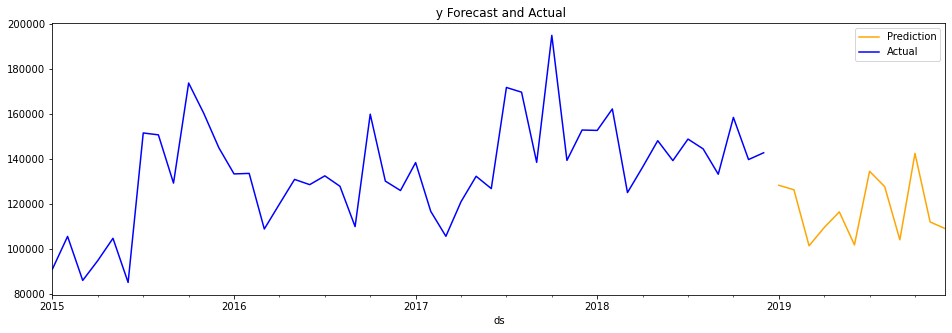

In [52]:
tl.plot_predict_and_actual(df_pred, df_tr)

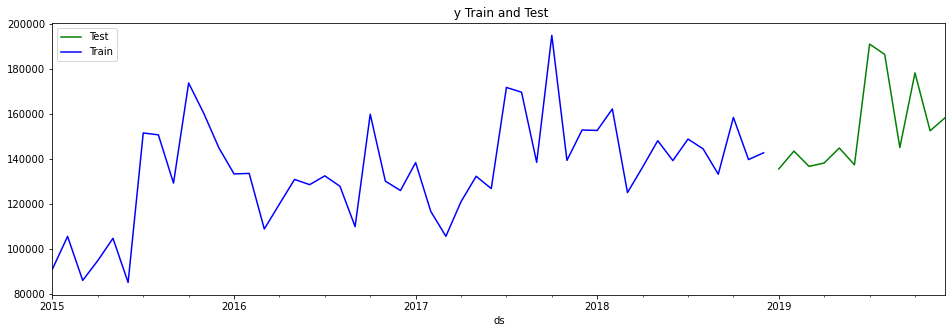

In [50]:
tl.plot_train_and_test(df_tst, df_tr)

(12, 2) (12, 3)


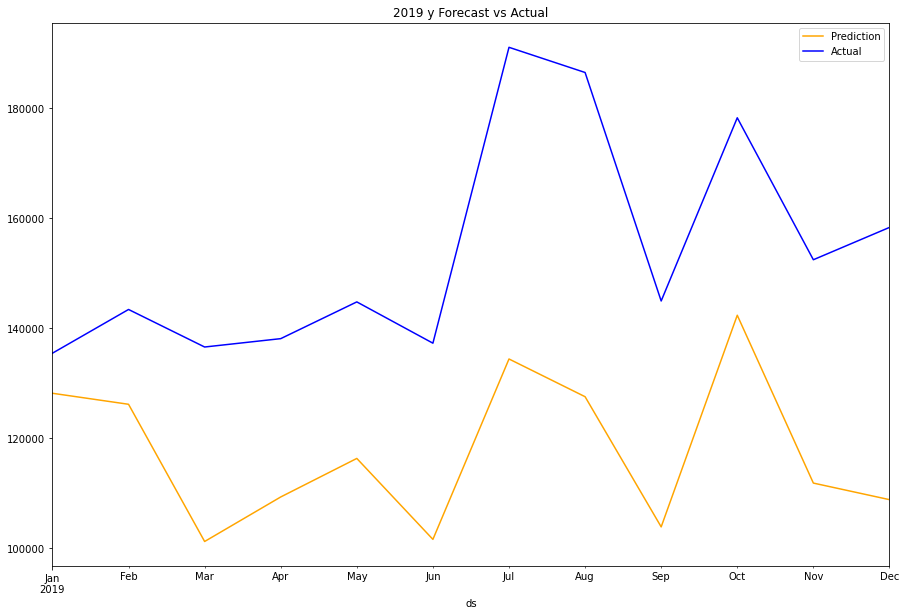

In [53]:
tl.plot_predict_vs_actual(df_pred, df_tst, 'M', '2019-01-01', '2019-12-31')

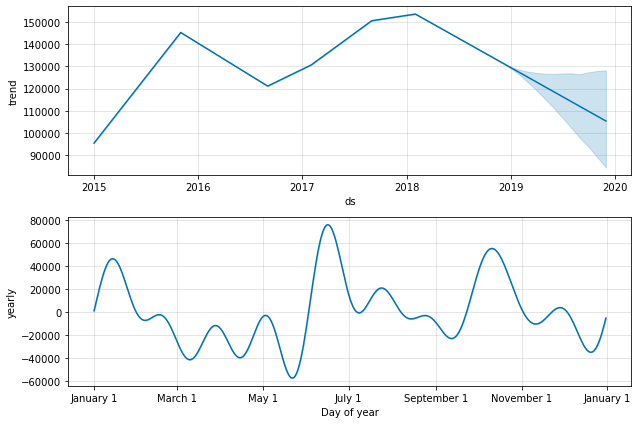

In [54]:
# Plot the components of the model
fig2=prophet.model.plot_components(prophet.forecast)

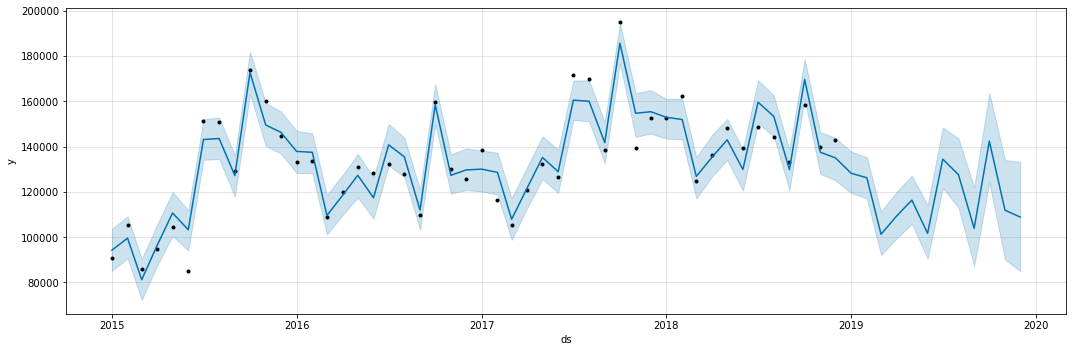

In [55]:
# Plot the forecast
fig, ax = plt.subplots(figsize=(15,5))
fig = prophet.model.plot(prophet.forecast,ax=ax)
plt.show()

In [56]:
tl.save_to_file(prophet.forecast, ['ds','yhat'],'test.csv' )